# LSTM Multivariate Time Series

### Stock Price Prediction

Reference:
    
https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679  

Data:

https://www.nasdaq.com/market-activity/stocks/goog/historical

The stock price prediction is based on multiple input features (multivariate regression).
This model will take 2 input features volume of stocks traded and the average stock price and will go back 50 business days for the prediction.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM

In [2]:
%matplotlib inline

In [3]:
stock_data = pd.read_csv("HistoricalQuotes.csv")

In [4]:
stock_data.head(2)

,Date,Close/Last,Volume,Open,High,Low
0,11/18/2020,1746.78,1173466,1765.23,1773.47,1746.14
1,11/17/2020,1770.15,1147114,1776.94,1785.00,1767.00


In [5]:
stock_data.describe()

,Close/Last,Volume,Open,High,Low
count,129.000000,1.290000e+02,129.000000,129.000000,129.000000
mean,1527.690271,1.768231e+06,1526.359005,1546.222563,1509.148661
std,99.559182,6.022653e+05,100.022140,102.030453,98.956210
min,1359.900000,9.319850e+05,1358.180000,1392.000000,1347.010000
25%,1453.440000,1.410229e+06,1450.090000,1468.960000,1434.530000
50%,1511.870000,1.610684e+06,1505.010000,1522.720000,1489.450000
75%,1571.680000,1.879751e+06,1577.030000,1590.000000,1550.530000
max,1781.380000,4.330862e+06,1790.900000,1818.060000,1767.690000


In [6]:
stock_data["average"] = (stock_data["High"] + stock_data["Low"])/2
stock_data.head(2)

,Date,Close/Last,Volume,Open,High,Low,average
0,11/18/2020,1746.78,1173466,1765.23,1773.47,1746.14,1759.805
1,11/17/2020,1770.15,1147114,1776.94,1785.00,1767.00,1776.000


In [7]:
input_feature= stock_data.iloc[:,[2,6]].values
input_data = input_feature

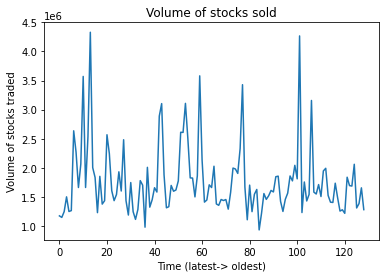

In [8]:
plt.plot(input_feature[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

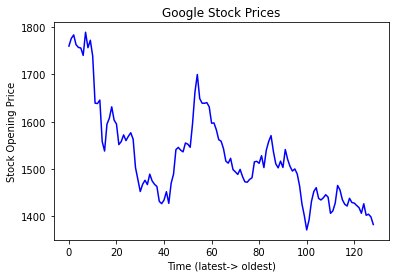

In [9]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [10]:
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [11]:
lookback= 50
test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [12]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)

print(X.shape)
print(X_test.shape)

print(y.shape)

(78, 50, 2)
(78, 50, 2)
(78,)


In [13]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
3/3 [==============================] - 6s 55ms/step - loss: 0.1330
Epoch 2/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0672
Epoch 3/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0318
Epoch 4/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0321
Epoch 5/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0324
Epoch 6/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0257
Epoch 7/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0240
Epoch 8/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0232
Epoch 9/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0251
Epoch 10/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0217
Epoch 11/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0198
Epoch 12/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0227
Epoch 13/200
3/3 [==============================]

In [16]:
predicted_value= model.predict(X_test)

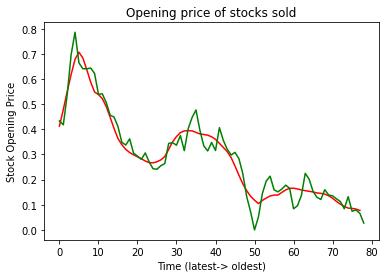

In [17]:
plt.plot(predicted_value, color= 'red')

plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()